In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('deliveries.csv')
df1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [3]:
df2 = pd.read_csv('matches.csv')
df2.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [4]:
match1 = df2[(df2['team1'] == 'Mumbai Indians') & (df2['team2'] == 'Kolkata Knight Riders')]
match2 = df2[(df2['team1'] == 'Kolkata Knight Riders') & (df2['team2'] == 'Mumbai Indians')]

Match1 = Mumbai Home Ground

Match2 = Kolkata Home Ground

# Overall Mumbai vs Kolkata:

In [5]:
match = pd.concat((match1,match2))
match.head()

id  season            city        date           team1  \
52    53    2017         Kolkata  2017-05-13  Mumbai Indians   
131  132    2009  Port Elizabeth  2009-04-27  Mumbai Indians   
137  138    2009     East London  2009-05-01  Mumbai Indians   
229  230    2010         Kolkata  2010-04-19  Mumbai Indians   
362  363    2012         Kolkata  2012-05-12  Mumbai Indians   

                     team2            toss_winner toss_decision  result  \
52   Kolkata Knight Riders  Kolkata Knight Riders         field  normal   
131  Kolkata Knight Riders         Mumbai Indians           bat  normal   
137  Kolkata Knight Riders         Mumbai Indians           bat  normal   
229  Kolkata Knight Riders         Mumbai Indians           bat  normal   
362  Kolkata Knight Riders         Mumbai Indians           bat  normal   

     dl_applied                 winner  win_by_runs  win_by_wickets  \
52            0         Mumbai Indians            9               0   
131           0         Mumbai Indians           92               0   
137           0         Mumbai Indians            9               0   
229           0  Kolkata Knight Riders            0               9   
362           0         Mumbai Indians           27               0   

    player_of_match             venue         umpire1      umpire2 umpire3  
52        AT Rayudu      Eden Gardens  A Nand Kishore       S Ravi     NaN  
131    SR Tendulkar  St George's Park      BG Jerling    RB Tiffin     NaN  
137       JP Duminy      Buffalo Park       M Erasmus  SK Tarapore     NaN  
229        M Kartik      Eden Gardens      BG Jerling  RE Koertzen     NaN  
362       RG Sharma      Eden Gardens          S Ravi   SJA Taufel     NaN

Matches played between Mumbai and Kolkata.

In [6]:
match.shape

(25, 18)

In [7]:
match['winner'].value_counts()

Mumbai Indians           19
Kolkata Knight Riders     6
Name: winner, dtype: int64

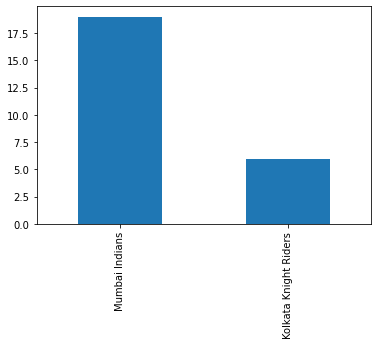

In [8]:
match['winner'].value_counts().plot.bar()
plt.show()

Mumbai won 19 times and Kolkata won 6 times against each other.

In [9]:
match['toss_winner'].value_counts()

Mumbai Indians           15
Kolkata Knight Riders    10
Name: toss_winner, dtype: int64

In [10]:
match['toss_decision'].value_counts()

field    16
bat       9
Name: toss_decision, dtype: int64

In [11]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts()

Mumbai Indians           12
Kolkata Knight Riders     3
Name: winner, dtype: int64

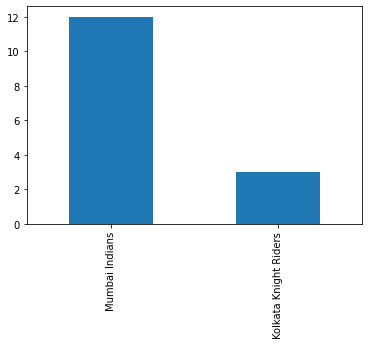

In [12]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts().plot.bar()
plt.show()

Mumbai won the toss and won the match 12 times, whereas Kolkata won 3 times. So winning toss plays a vital roll in winning the match.

In [13]:
ids = list(match['id'])
ids1 = list(match2['id'])
delivery = df1[df1['match_id'].isin(ids)]
delivery.head()

match_id  inning           batting_team    bowling_team  over  ball  \
1424         7       1  Kolkata Knight Riders  Mumbai Indians     1     1   
1425         7       1  Kolkata Knight Riders  Mumbai Indians     1     2   
1426         7       1  Kolkata Knight Riders  Mumbai Indians     1     3   
1427         7       1  Kolkata Knight Riders  Mumbai Indians     1     4   
1428         7       1  Kolkata Knight Riders  Mumbai Indians     1     5   

        batsman non_striker      bowler  is_super_over  ...  bye_runs  \
1424  G Gambhir     CA Lynn  SL Malinga              0  ...         0   
1425    CA Lynn   G Gambhir  SL Malinga              0  ...         0   
1426    CA Lynn   G Gambhir  SL Malinga              0  ...         0   
1427  G Gambhir     CA Lynn  SL Malinga              0  ...         0   
1428  G Gambhir     CA Lynn  SL Malinga              0  ...         0   

      legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
1424            0            0             0             1           0   
1425            0            0             0             0           1   
1426            0            0             0             1           0   
1427            0            0             0             0           0   
1428            0            0             0             1           0   

      total_runs  player_dismissed dismissal_kind fielder  
1424           1               NaN            NaN     NaN  
1425           1               NaN            NaN     NaN  
1426           1               NaN            NaN     NaN  
1427           0               NaN            NaN     NaN  
1428           1               NaN            NaN     NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Mumbai and Kolkata.

In [15]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## Mumbai's Wickets Fallen in between 6 and 15 overs:

In [96]:
total_wickets_Mumbai = delivery[(delivery['batting_team'] == 'Mumbai Indians') & (delivery['over'] >= 7) & (delivery['over'] <= 15)]['player_dismissed'].count()
total_wickets_Mumbai

46

Mumbai lost 46 wickets between 6 and 15 overs against Kolkata.

In [97]:
avg_wickets_Mumbai = math.ceil(total_wickets_Mumbai/len(ids))
avg_wickets_Mumbai

2

Mumbai lost 2 wickets in an average per match between 6 and 15 overs against Kolkata.

In [98]:
total_wickets_batting_first = delivery[(delivery['batting_team'] == 'Mumbai Indians') & (delivery['over'] >= 7) & (delivery['over'] <= 15) & (delivery['inning'] == 1)]['player_dismissed'].count()
total_wickets_batting_first

18

Mumbai lost 18 wickets between 6 and 15 overs against Kolkata while batting first.

In [99]:
total_matches_batting_first_Mumbai = len(delivery[(delivery['batting_team'] == 'Mumbai Indians') & (delivery['inning'] == 1)]['match_id'].unique())
total_matches_batting_first_Mumbai

11

Total innings of Mumbai batting first against Kolkata.

In [100]:
avg_wickets_Mumbai_batting_first = math.ceil(total_wickets_batting_first/total_matches_batting_first_Mumbai)
avg_wickets_Mumbai_batting_first

2

Mumbai lost 2 wickets in an average per match between 6 and 15 overs against Kolkata while batting first.

In [101]:
total_wickets_batting_second = delivery[(delivery['batting_team'] == 'Mumbai Indians') & (delivery['over'] >= 7) & (delivery['over'] <= 15) & (delivery['inning'] == 2)]['player_dismissed'].count()
total_wickets_batting_second

28

Mumbai lost 28 wickets between 6 and 15 overs against Kolkata while batting second.

In [102]:
total_matches_batting_second_Mumbai = len(delivery[(delivery['batting_team'] == 'Mumbai Indians') & (delivery['inning'] == 2)]['match_id'].unique())
total_matches_batting_second_Mumbai

14

Total innings of Mumbai batting second against Kolkata.

In [103]:
avg_wickets_Mumbai_batting_second = math.ceil(total_wickets_batting_second/total_matches_batting_second_Mumbai)
avg_wickets_Mumbai_batting_second

2

Mumbai lost 2 wickets in an average per match between 6 and 15 overs against Kolkata while batting second.

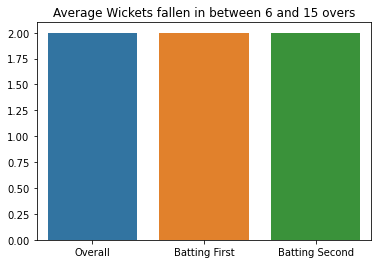

In [104]:
average_wickets = pd.Series([avg_wickets_Mumbai,avg_wickets_Mumbai_batting_first,avg_wickets_Mumbai_batting_second],index=['Overall','Batting First','Batting Second'])
sns.barplot(x=average_wickets.index,y=average_wickets)
plt.title('Average Wickets fallen in between 6 and 15 overs')
plt.show()

So Mumbai lost 2 wickets in an average between 6 and 15 overs against Kolkata while batting first or second.

## Fours hit by Kolkata:

In [25]:
total_4s_Kolkata = len(delivery[(delivery['batting_team'] == 'Kolkata Knight Riders') & (delivery['batsman_runs'] == 4)]['batsman_runs'])
total_4s_Kolkata

329

Kolkata hit 329 fours against Mumbai till now.

In [26]:
avg_4s_kolkata = math.ceil(total_4s_Kolkata/len(ids))
avg_4s_kolkata

14

Kolkata hit 14 fours in an average per match.

In [27]:
total_4s_by_Kolkata_1st_inning = len(delivery[(delivery['batting_team'] == 'Kolkata Knight Riders') & (delivery['batsman_runs'] == 4) & (delivery['inning'] == 1)]['batsman_runs'])
total_4s_by_Kolkata_1st_inning

183

Kolkata hit 183 fours against Mumbai while batting first.

In [28]:
total_matches_batting_first_Kolkata = len(delivery[(delivery['batting_team'] == 'Kolkata Knight Riders') & (delivery['inning'] == 1)]['match_id'].unique())
total_matches_batting_first_Kolkata

14

Total innings of Kolkata batting first against Mumbai.

In [29]:
avg_4s_kolkata_batting_first = math.ceil(total_4s_by_Kolkata_1st_inning/total_matches_batting_first_Kolkata)
avg_4s_kolkata_batting_first

14

Kolkata hit 14 fours in an average per match while batting first.

In [30]:
total_4s_by_Kolkata_2nd_inning = len(delivery[(delivery['batting_team'] == 'Kolkata Knight Riders') & (delivery['batsman_runs'] == 4) & (delivery['inning'] == 2)]['batsman_runs'])
total_4s_by_Kolkata_2nd_inning

146

Kolkata hit 146 fours against Mumbai while batting second.

In [31]:
total_matches_batting_second_Kolkata = len(delivery[(delivery['batting_team'] == 'Kolkata Knight Riders') & (delivery['inning'] == 2)]['match_id'].unique())
total_matches_batting_second_Kolkata

11

Total innings of Kolkata batting second against Mumbai.

In [32]:
avg_4s_kolkata_batting_second = math.ceil(total_4s_by_Kolkata_2nd_inning/total_matches_batting_second_Kolkata)
avg_4s_kolkata_batting_second

14

Kolkata hit 14 fours in an average per match while batting second.

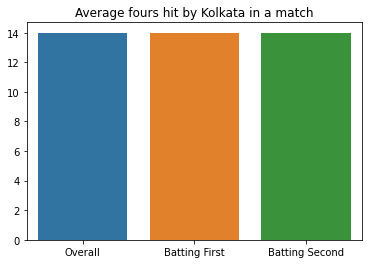

In [33]:
average_4s_Kolkata = pd.Series([avg_4s_kolkata,avg_4s_kolkata_batting_first,avg_4s_kolkata_batting_second],index=['Overall','Batting First','Batting Second'])
sns.barplot(x=average_4s_Kolkata.index,y=average_4s_Kolkata)
plt.title('Average fours hit by Kolkata in a match')
plt.show()

So Kolkata hit 14 fours in an average per match against Kolkata while batting first or second.

## Total Runs in a match:

In [34]:
total_run = delivery['batsman_runs'].sum()
total_run

7288

Total 7288 runs made in Mumbai vs Kolkata match till now.

In [35]:
total_run_Mumbai = delivery[delivery['batting_team'] == 'Mumbai Indians']['batsman_runs'].sum()
total_run_Mumbai

3755

Mumbai scored total 3755 runs against Kolkata till now.

In [36]:
total_run_Kolkata = delivery[delivery['batting_team'] != 'Mumbai Indians']['batsman_runs'].sum()
total_run_Kolkata

3533

Kolkata scored total 3533 runs against Mumbai till now.

In [37]:
avg_run_per_match = math.ceil(total_run/len(ids))
avg_run_per_match

292

292 runs in an average made in a match betwen Mumbai and Kolkata.

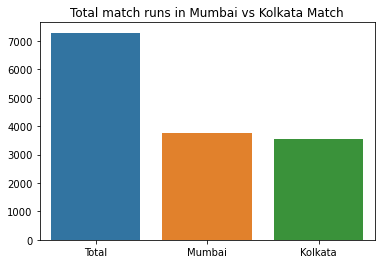

In [38]:
total_match_runs = pd.Series([total_run,total_run_Mumbai,total_run_Kolkata],index = ['Total','Mumbai','Kolkata'])
sns.barplot(x=total_match_runs.index,y=total_match_runs)
plt.title('Total match runs in Mumbai vs Kolkata Match')
plt.show()

Mumbai scored more runs against Kolkata.

In [39]:
total_run_Mumbai_batting_first = delivery[(delivery['batting_team'] == 'Mumbai Indians') & (delivery['inning'] == 1)]['batsman_runs'].sum()
total_run_Mumbai_batting_first

1783

Mumbai scored total 1783 runs against Kolkata while batting first.

In [40]:
total_run_Mumbai_batting_second = delivery[(delivery['batting_team'] == 'Mumbai Indians') & (delivery['inning'] == 2)]['batsman_runs'].sum()
total_run_Mumbai_batting_second

1972

Mumbai scored total 1972 runs against Kolkata while batting second.

In [41]:
total_run_Kolkata_batting_first = delivery[(delivery['batting_team'] != 'Mumbai Indians') & (delivery['inning'] == 1)]['batsman_runs'].sum()
total_run_Kolkata_batting_first

2052

Kolkata scored total 2052 runs against Mumbai while batting first.

In [42]:
total_run_Kolkata_batting_second = delivery[(delivery['batting_team'] != 'Mumbai Indians') & (delivery['inning'] == 2)]['batsman_runs'].sum()
total_run_Kolkata_batting_second

1481

Kolkata scored total 1481 runs against Mumbai while batting second.

In [43]:
avg_run_Mumbai_batting_first = math.ceil(total_run_Mumbai_batting_first/total_matches_batting_first_Mumbai)
avg_run_Mumbai_batting_first

163

Mumbai scored 163 in as average against Kolkata while batting first.

In [44]:
avg_run_Mumbai_batting_second = math.ceil(total_run_Mumbai_batting_second/total_matches_batting_second_Mumbai)
avg_run_Mumbai_batting_second

141

Mumbai scored 141 in as average against Kolkata while batting second.

In [45]:
avg_run_Kolkata_batting_first = math.ceil(total_run_Kolkata_batting_first/total_matches_batting_first_Kolkata)
avg_run_Kolkata_batting_first

147

Kolkata scored 147 in as average against Mumbai while batting first.

In [46]:
avg_run_Kolkata_batting_second = math.ceil(total_run_Kolkata_batting_second/total_matches_batting_second_Kolkata)
avg_run_Kolkata_batting_second

135

Kolkata scored 135 in as average against Mumbai while batting second.

In [47]:
total_runs_mumbai_batting_first_Kolkata_batting_second = avg_run_Mumbai_batting_first+avg_run_Kolkata_batting_second
total_runs_mumbai_batting_first_Kolkata_batting_second

298

298 runs in an average per match when Mumbai bat first and Kolkata bat second.

In [48]:
total_runs_mumbai_batting_second_Kolkata_batting_first = avg_run_Mumbai_batting_second+avg_run_Kolkata_batting_first
total_runs_mumbai_batting_second_Kolkata_batting_first

288

288 runs in an average per match when Kolkata bat first and Mumbai bat second.

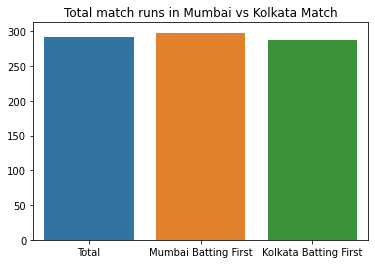

In [49]:
average_match_runs = pd.Series([avg_run_per_match,total_runs_mumbai_batting_first_Kolkata_batting_second,total_runs_mumbai_batting_second_Kolkata_batting_first],index = ['Total','Mumbai Batting First','Kolkata Batting First'])
sns.barplot(x=average_match_runs.index,y=average_match_runs)
plt.title('Total match runs in Mumbai vs Kolkata Match')
plt.show()

So when Mumbai bat first the total score is slightly higher than when Mumbai bat second.

## Rohit Sharma Dismissal Type:

In [50]:
total_dismissal_Rohit_sharma = delivery[delivery['player_dismissed'] == 'RG Sharma']['dismissal_kind'].value_counts(normalize=True)*100
total_dismissal_Rohit_sharma

caught               50.000000
lbw                  21.428571
bowled               14.285714
caught and bowled     7.142857
run out               7.142857
Name: dismissal_kind, dtype: float64

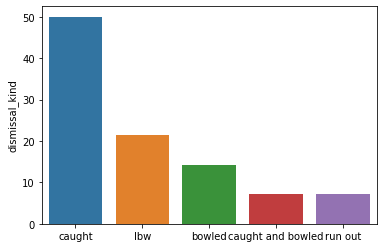

In [51]:
sns.barplot(x = total_dismissal_Rohit_sharma.index , y = total_dismissal_Rohit_sharma)
plt.show()

Rohit Sharma got out by caught = 50% times, bowled = 14% times, lbw = 21% times, caught and bowled and run out 7% times.

In [52]:
total_dismissal_Rohit_sharma_batting_first = delivery[(delivery['player_dismissed'] == 'RG Sharma') & (delivery['inning'] == 1)]['dismissal_kind'].value_counts(normalize=True)*100
total_dismissal_Rohit_sharma_batting_first

caught    50.000000
bowled    33.333333
lbw       16.666667
Name: dismissal_kind, dtype: float64

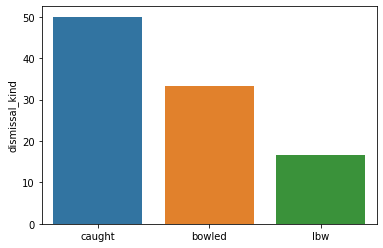

In [53]:
sns.barplot(x = total_dismissal_Rohit_sharma_batting_first.index , y = total_dismissal_Rohit_sharma_batting_first)
plt.show()

Rohit Sharma got out by caught = 50% times, bowled = 33% times, lbw = 16% times.

In [54]:
total_dismissal_Rohit_sharma_batting_second = delivery[(delivery['player_dismissed'] == 'RG Sharma') & (delivery['inning'] == 2)]['dismissal_kind'].value_counts(normalize=True)*100
total_dismissal_Rohit_sharma_batting_second

caught               50.0
lbw                  25.0
caught and bowled    12.5
run out              12.5
Name: dismissal_kind, dtype: float64

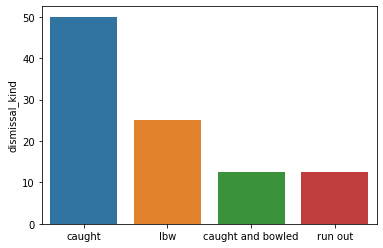

In [55]:
sns.barplot(x = total_dismissal_Rohit_sharma_batting_second.index , y = total_dismissal_Rohit_sharma_batting_second)
plt.show()

Rohit Sharma got out by caught = 50% times, lbw = 25% times, caught and bowled and run out - 12.5% times.

So Rohit Sharma most of the time got out by caught against Kolkata.

## Abu Dhabi Ground Condition Similar like Kolkata home Ground so will consider Kolkata Home Ground:

In [56]:
match2.shape

(14, 18)

In [57]:
match2['winner'].value_counts()

Mumbai Indians           11
Kolkata Knight Riders     3
Name: winner, dtype: int64

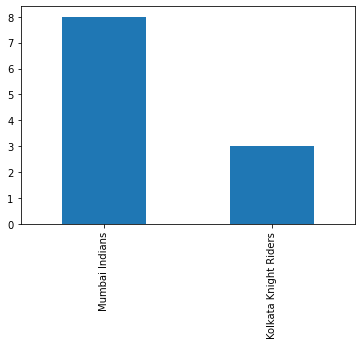

In [58]:
match1['winner'].value_counts().plot.bar()
plt.show()

Mumbai won 11 times and KOlkata won 3 times against each other at Kolkata home ground.

In [59]:
match2['toss_winner'].value_counts()

Mumbai Indians           10
Kolkata Knight Riders     4
Name: toss_winner, dtype: int64

In [60]:
match2['toss_decision'].value_counts()

field    10
bat       4
Name: toss_decision, dtype: int64

In [61]:
match2[match2['toss_winner'] == match2['winner']]['winner'].value_counts()

Mumbai Indians           8
Kolkata Knight Riders    1
Name: winner, dtype: int64

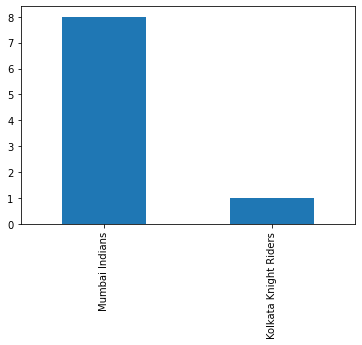

In [62]:
match2[match2['toss_winner'] == match2['winner']]['winner'].value_counts().plot.bar()
plt.show()

Mumbai won 8 times after winning toss and Kolkata only 1 time at Kolkata home ground. That means whenever Mumbai won the toss, they win against Kolkat most of the time at their home ground.

In [63]:
delivery1 = df1[(df1['match_id'].isin(ids1))]
delivery1.head()

match_id  inning           batting_team    bowling_team  over  ball  \
1424         7       1  Kolkata Knight Riders  Mumbai Indians     1     1   
1425         7       1  Kolkata Knight Riders  Mumbai Indians     1     2   
1426         7       1  Kolkata Knight Riders  Mumbai Indians     1     3   
1427         7       1  Kolkata Knight Riders  Mumbai Indians     1     4   
1428         7       1  Kolkata Knight Riders  Mumbai Indians     1     5   

        batsman non_striker      bowler  is_super_over  ...  bye_runs  \
1424  G Gambhir     CA Lynn  SL Malinga              0  ...         0   
1425    CA Lynn   G Gambhir  SL Malinga              0  ...         0   
1426    CA Lynn   G Gambhir  SL Malinga              0  ...         0   
1427  G Gambhir     CA Lynn  SL Malinga              0  ...         0   
1428  G Gambhir     CA Lynn  SL Malinga              0  ...         0   

      legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
1424            0            0             0             1           0   
1425            0            0             0             0           1   
1426            0            0             0             1           0   
1427            0            0             0             0           0   
1428            0            0             0             1           0   

      total_runs  player_dismissed dismissal_kind fielder  
1424           1               NaN            NaN     NaN  
1425           1               NaN            NaN     NaN  
1426           1               NaN            NaN     NaN  
1427           0               NaN            NaN     NaN  
1428           1               NaN            NaN     NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Mumbai and Kolkata at Kolkata home ground.

## Mumbai's Wickets Fallen in between 6 and 15 overs at Kolkata home ground:

In [105]:
total_wickets_Mumbai_Kolkata_home_ground = delivery1[(delivery1['batting_team'] == 'Mumbai Indians') & (delivery1['over'] >= 7) & (delivery1['over'] <= 15)]['player_dismissed'].count()
total_wickets_Mumbai_Kolkata_home_ground

28

Mumbai lost 28 wickets between 6 and 15 overs against Kolkata at Kolkata home ground.

In [106]:
avg_wickets_Mumbai_Kolkata_home_ground = math.ceil(total_wickets_Mumbai_Kolkata_home_ground/len(ids1))
avg_wickets_Mumbai_Kolkata_home_ground

2

Mumbai lost 2 wickets in an average per match between 6 and 15 overs against Kolkata at Kolkata home ground.

In [107]:
total_wickets_batting_first_Kolkata_home_ground = delivery1[(delivery1['batting_team'] == 'Mumbai Indians') & (delivery1['over'] >= 6) & (delivery1['over'] <= 15) & (delivery1['inning'] == 1)]['player_dismissed'].count()
total_wickets_batting_first_Kolkata_home_ground

0

Mumbai didn't bat first against Kolkata at Kolkata home ground.

So Mumbai lost 3 wickets in an average per match between 6 and 15 overs against Kolkata while batting second at Kolkata home ground.

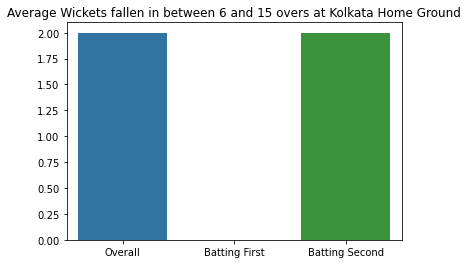

In [108]:
average_wickets_Kolkata_home_ground = pd.Series([avg_wickets_Mumbai_Kolkata_home_ground,0,avg_wickets_Mumbai_Kolkata_home_ground],index=['Overall','Batting First','Batting Second'])
sns.barplot(x=average_wickets_Kolkata_home_ground.index,y=average_wickets_Kolkata_home_ground)
plt.title('Average Wickets fallen in between 6 and 15 overs at Kolkata Home Ground')
plt.show()


So Mumbai lost 2 wickets in an average against Kolkata at Kolkata home ground while batting second and they didn't play a single match batting first yet.

## Fours hit by Kolkata at Kolkata home ground:

In [68]:
total_4s_Kolkata_Kolkata_home_ground = len(delivery1[(delivery1['batting_team'] == 'Kolkata Knight Riders') & (delivery1['batsman_runs'] == 4)]['batsman_runs'])
total_4s_Kolkata_Kolkata_home_ground

183

Kolkata hit 183 fours against Mumbai till now at Kolkata home ground.

In [69]:
avg_4s_kolkata_Kolkata_home_ground = math.ceil(total_4s_Kolkata_Kolkata_home_ground/len(ids1))
avg_4s_kolkata_Kolkata_home_ground

14

Kolkata hit 14 fours in an average per match at Kolkata home ground.

In [70]:
total_4s_by_Kolkata_1st_inning_Kolkata_home_ground = len(delivery1[(delivery1['batting_team'] == 'Kolkata Knight Riders') & (delivery1['batsman_runs'] == 4) & (delivery1['inning'] == 1)]['batsman_runs'])
total_4s_by_Kolkata_1st_inning_Kolkata_home_ground

183

Kolkata hit 183 fours against Mumbai while batting first as they didn't bat in the second innings yet at Kolkata home ground.

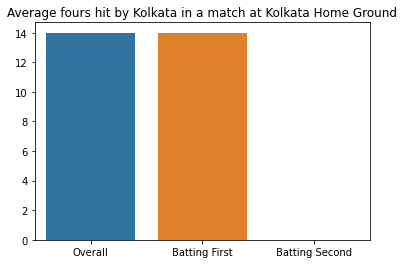

In [71]:
average_4s_Kolkata_Kolkata_home_ground = pd.Series([avg_4s_kolkata_Kolkata_home_ground,avg_4s_kolkata_Kolkata_home_ground,0],index=['Overall','Batting First','Batting Second'])
sns.barplot(x=average_4s_Kolkata_Kolkata_home_ground.index,y=average_4s_Kolkata_Kolkata_home_ground)
plt.title('Average fours hit by Kolkata in a match at Kolkata Home Ground')
plt.show()

So Kolkata hit 14 fours in an average per match against Kolkata while batting first.

Kolkata didn't bat in second inning at Kolkata home ground yet.

## Total Runs in a match at Kolkata home ground:

In [72]:
total_run_Kolkata_home_ground = delivery1['batsman_runs'].sum()
total_run_Kolkata_home_ground

4024

Total 4024 runs made in Mumbai vs Kolkata match till now at Kolkata home ground.

In [73]:
total_run_Mumbai_Kolkata_home_ground = delivery1[delivery1['batting_team'] == 'Mumbai Indians']['batsman_runs'].sum()
total_run_Mumbai_Kolkata_home_ground

1972

Mumbai scored total 1972 runs against Kolkata till now at Kolkata home ground.

In [74]:
total_run_Kolkata_Kolkata_home_ground = delivery1[delivery1['batting_team'] != 'Mumbai Indians']['batsman_runs'].sum()
total_run_Kolkata_Kolkata_home_ground

2052

Kolkata scored total 2052 runs against Mumbai till now at Kolkata home ground.

In [75]:
avg_run_per_match_Kolkata_home_ground = math.ceil(total_run_Kolkata_home_ground/len(ids1))
avg_run_per_match_Kolkata_home_ground

288

288 runs in an average made in a match betwen Mumbai and Kolkata at Kolkata home ground.

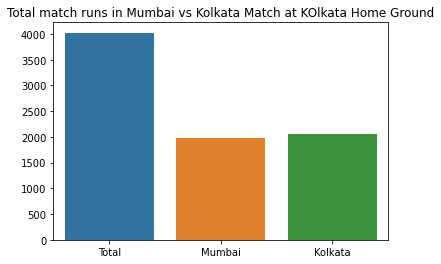

In [76]:
total_match_runs_Kolkata_home_ground = pd.Series([total_run_Kolkata_home_ground,total_run_Mumbai_Kolkata_home_ground,total_run_Kolkata_Kolkata_home_ground],index = ['Total','Mumbai','Kolkata'])
sns.barplot(x=total_match_runs_Kolkata_home_ground.index,y=total_match_runs_Kolkata_home_ground)
plt.title('Total match runs in Mumbai vs Kolkata Match at KOlkata Home Ground')
plt.show()

Mumbai scored less runs against Kolkata at Kolkata home ground.

In [77]:
total_run_Mumbai_batting_second_Kolkata_home_ground = delivery1[(delivery1['batting_team'] == 'Mumbai Indians') & (delivery1['inning'] == 2)]['batsman_runs'].sum()
total_run_Mumbai_batting_second_Kolkata_home_ground

1972

Mumbai scored total 1972 runs against Kolkata while batting second at Kolkata home ground.

In [78]:
total_run_Kolkata_batting_first_Kolkata_home_ground = delivery1[(delivery1['batting_team'] != 'Mumbai Indians') & (delivery1['inning'] == 1)]['batsman_runs'].sum()
total_run_Kolkata_batting_first_Kolkata_home_ground

2052

Kolkata scored total 2052 runs against Mumbai while batting first at Kolkata home ground.

In [79]:
avg_run_Mumbai_batting_second_Kolkata_home_ground = math.ceil(total_run_Mumbai_batting_second_Kolkata_home_ground/len(ids1))
avg_run_Mumbai_batting_second_Kolkata_home_ground

141

Mumbai scored 141 in as average against Kolkata while batting second at Kolkata home ground.

In [80]:
avg_run_Kolkata_batting_first_Kolkata_home_ground = math.ceil(total_run_Kolkata_batting_first_Kolkata_home_ground/len(ids1))
avg_run_Kolkata_batting_first_Kolkata_home_ground

147

Kolkata scored 147 in as average against Mumbai while batting first at Kolkata home ground.

In [81]:
total_runs_mumbai_batting_second_Kolkata_batting_first_Kolkata_home_ground = avg_run_Mumbai_batting_second_Kolkata_home_ground+avg_run_Kolkata_batting_first_Kolkata_home_ground
total_runs_mumbai_batting_second_Kolkata_batting_first_Kolkata_home_ground

288

288 runs in an average per match when Kolkata bat first and Mumbai bat second at Kolkata home ground.

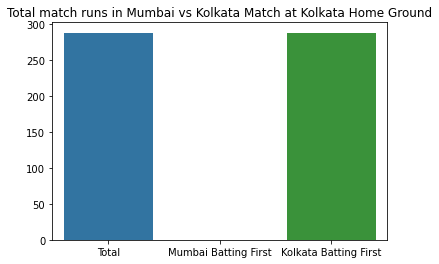

In [82]:
average_match_runs_Kolkata_home_ground = pd.Series([avg_run_per_match_Kolkata_home_ground,0,total_runs_mumbai_batting_second_Kolkata_batting_first_Kolkata_home_ground],index = ['Total','Mumbai Batting First','Kolkata Batting First'])
sns.barplot(x=average_match_runs_Kolkata_home_ground.index,y=average_match_runs_Kolkata_home_ground)
plt.title('Total match runs in Mumbai vs Kolkata Match at Kolkata Home Ground')
plt.show()

So 288 in an average per match total score made in Kolkata vs Mumbai match at Kolkata home ground.

Mumbai didn't bat in first inning at Kolkata home ground yet.

## Rohit Sharma Dismissal Type at Kolkata Home Ground:

In [83]:
total_dismissal_Rohit_sharma_Kolkata_home_ground = delivery1[delivery1['player_dismissed'] == 'RG Sharma']['dismissal_kind'].value_counts(normalize=True)*100
total_dismissal_Rohit_sharma_Kolkata_home_ground

caught               50.0
lbw                  25.0
caught and bowled    12.5
run out              12.5
Name: dismissal_kind, dtype: float64

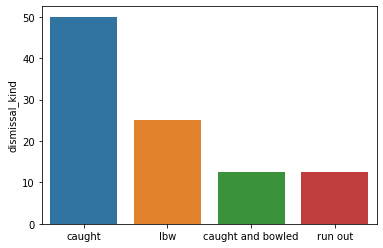

In [84]:
sns.barplot(x = total_dismissal_Rohit_sharma_Kolkata_home_ground.index , y = total_dismissal_Rohit_sharma_Kolkata_home_ground)
plt.show()

Rohit Sharma got out by caught = 50% times, bowled = 14% times, lbw = 21% times, caught and bowled and run out 7% times at Kolkata home ground.

In [85]:
total_dismissal_Rohit_sharma_batting_second_Kolkata_home_ground = delivery1[(delivery1['player_dismissed'] == 'RG Sharma') & (delivery1['inning'] == 2)]['dismissal_kind'].value_counts(normalize=True)*100
total_dismissal_Rohit_sharma_batting_second_Kolkata_home_ground

caught               50.0
lbw                  25.0
caught and bowled    12.5
run out              12.5
Name: dismissal_kind, dtype: float64

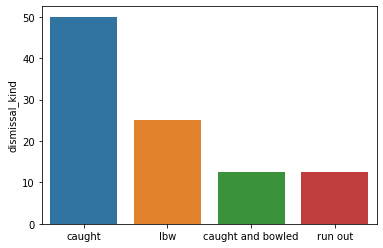

In [86]:
sns.barplot(x = total_dismissal_Rohit_sharma_batting_second_Kolkata_home_ground.index , y = total_dismissal_Rohit_sharma_batting_second_Kolkata_home_ground)
plt.show()

Rohit Sharma got out by caught = 50% times, lbw = 25% times, caught and bowled and run out - 12.5% times at Kolkata home ground.

So Rohit Sharma most of the time got out by caught against Kolkata at Kolkata home ground.